In [1]:
import sys, os
#path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir, 'dir1')))
#print(os.getcwd())
parent_path = os.path.normpath(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)))
#print(path2add)
sys.path.append(parent_path)
sys.path.append(os.path.normpath(os.path.join(parent_path,"gyrii")))

import json
import yaml
from underpinnings.OccupancyMap2 import OccupancyMap2, LidarMeasurement, ExactLidarMeasurement
import numpy as np
from gyrii.underpinnings.BayesianArray import BayesianArray


In [2]:
#sim_lidar_scan=[[15, 352.125, 1557.5], [15, 353.5625, 1449.0], [15, 354.921875, 1393.25], [15, 356.21875, 1341.5], [15, 357.578125, 1294.75], [15, 358.953125, 1253.75], [15, 0.265625, 1208.0], [15, 1.640625, 1175.5], [15, 2.96875, 1141.75], [15, 4.375, 1106.5], [15, 5.71875, 1077.0], [15, 7.0, 1050.25], [15, 8.421875, 1023.25], [15, 9.796875, 997.75], [15, 11.03125, 975.75], [15, 12.40625, 955.75], [15, 13.734375, 939.25], [15, 15.125, 918.5], [15, 16.5, 900.0], [15, 17.828125, 889.0], [15, 19.078125, 874.0], [15, 20.4375, 857.25], [15, 21.765625, 847.5], [15, 23.09375, 860.75], [15, 24.484375, 820.0], [15, 25.859375, 764.5], [15, 27.421875, 725.0], [15, 28.859375, 673.5], [15, 30.3125, 634.5], [15, 31.65625, 601.25], [15, 33.265625, 574.0], [15, 34.578125, 546.5], [15, 35.90625, 522.75], [15, 37.359375, 501.75], [15, 38.859375, 483.75], [15, 40.296875, 465.5], [15, 41.5625, 451.25], [15, 42.9375, 436.5], [15, 44.515625, 422.5], [15, 45.828125, 409.25], [15, 47.171875, 399.5], [15, 48.6875, 389.0], [15, 50.015625, 379.5], [15, 51.640625, 369.75], [15, 53.3125, 362.0], [15, 54.328125, 354.0], [15, 55.640625, 348.75], [15, 57.078125, 340.5], [15, 58.421875, 333.75], [15, 60.28125, 329.0], [15, 61.546875, 321.75], [15, 62.796875, 316.75], [15, 64.296875, 312.5], [15, 65.90625, 307.75], [15, 67.359375, 303.75], [15, 68.1875, 301.0], [15, 70.0625, 296.25], [15, 70.84375, 293.0], [15, 72.140625, 289.75], [15, 74.09375, 287.0], [15, 75.5, 283.75], [15, 76.34375, 282.0], [15, 78.3125, 279.5], [15, 79.390625, 277.75], [15, 81.15625, 275.25], [15, 81.9375, 273.0], [15, 83.8125, 272.25], [15, 84.6875, 271.25], [15, 85.890625, 269.75], [15, 87.125, 269.25], [15, 88.765625, 268.25], [15, 89.984375, 266.75], [15, 91.703125, 266.25], [15, 93.25, 265.75], [15, 93.75, 265.25], [15, 95.453125, 265.0], [15, 96.4375, 265.0], [15, 98.59375, 265.0], [15, 98.78125, 265.0], [15, 100.359375, 265.25], [15, 102.546875, 265.75], [15, 103.0, 266.25], [15, 104.578125, 267.0], [15, 106.203125, 268.25], [15, 107.90625, 268.75], [15, 108.953125, 270.0], [15, 109.4375, 271.0], [15, 111.265625, 272.25], [15, 112.09375, 273.25], [15, 113.59375, 276.25], [15, 114.484375, 277.75], [15, 116.453125, 279.75], [15, 116.96875, 281.25], [15, 118.421875, 284.75], [15, 119.8125, 287.0], [15, 121.015625, 290.0], [15, 122.5625, 292.75], [15, 123.34375, 295.25], [15, 125.15625, 299.0], [15, 125.671875, 302.25], [15, 127.53125, 305.75], [15, 128.703125, 310.5], [15, 130.078125, 314.5], [15, 131.375, 319.25], [15, 131.9375, 323.25], [15, 133.53125, 328.5], [15, 134.46875, 333.75], [15, 135.90625, 340.0], [15, 136.765625, 346.5], [15, 138.140625, 353.75], [15, 139.21875, 359.75], [15, 140.609375, 367.5], [15, 141.671875, 375.75], [15, 143.140625, 383.75], [15, 144.484375, 393.25], [15, 145.515625, 402.75], [15, 146.953125, 412.75], [15, 148.015625, 425.0], [15, 149.0, 436.25], [15, 150.390625, 449.0], [15, 151.5, 465.0], [15, 152.875, 481.25], [14, 153.984375, 493.75], [15, 155.046875, 513.25], [12, 156.359375, 534.5], [14, 157.71875, 558.0], [14, 158.75, 581.0], [14, 159.9375, 606.5], [13, 161.125, 635.0], [11, 162.421875, 666.75], [13, 163.640625, 702.75], [9, 164.859375, 745.5], [9, 166.015625, 794.0], [9, 168.390625, 916.75], [9, 170.640625, 1103.25], [14, 174.21875, 1546.25], [15, 175.453125, 1771.75], [15, 176.734375, 1799.0], [15, 178.03125, 1821.5], [15, 179.328125, 1850.5], [15, 180.640625, 1879.75], [15, 181.953125, 1918.0], [15, 183.25, 1947.0], [15, 184.546875, 1985.0], [15, 185.8125, 2028.75], [15, 186.9375, 2062.0], [15, 188.203125, 2110.75], [15, 189.53125, 2157.75], [15, 190.796875, 2205.75], [15, 192.109375, 2244.0], [15, 193.390625, 2321.5], [15, 194.65625, 2394.25], [15, 195.96875, 2473.25], [15, 197.28125, 2543.75], [15, 198.53125, 2655.5], [15, 199.859375, 2731.0], [15, 201.15625, 2807.25], [15, 202.46875, 2869.5], [15, 203.75, 3021.25], [15, 205.03125, 3127.5], [15, 206.328125, 3275.5], [15, 207.625, 3376.75], [15, 208.9375, 3507.0], [15, 210.234375, 3452.5], [15, 211.546875, 3454.75], [15, 212.859375, 3448.5], [15, 214.203125, 3399.25], [15, 215.484375, 3386.5], [15, 216.8125, 3368.75], [15, 218.125, 3354.0], [15, 219.421875, 3340.0], [15, 220.71875, 3312.0], [15, 222.0625, 3280.5], [15, 229.0625, 250.75], [15, 230.078125, 251.0], [15, 231.640625, 250.75], [15, 233.734375, 250.5], [15, 234.046875, 250.0], [15, 235.96875, 250.0], [15, 236.734375, 250.0], [15, 239.453125, 251.0], [10, 243.015625, 3261.75], [15, 244.328125, 3274.5], [15, 245.65625, 3270.0], [15, 246.96875, 3298.5], [15, 248.25, 3314.5], [15, 249.578125, 3328.0], [15, 250.984375, 3315.25], [15, 252.25, 3395.5], [15, 253.578125, 3409.0], [15, 254.90625, 3444.75], [15, 256.203125, 3459.0], [15, 257.515625, 3512.25], [15, 258.828125, 3526.5], [15, 260.203125, 3023.0], [15, 261.5625, 2768.75], [15, 262.90625, 2526.5], [15, 264.265625, 2452.25], [15, 265.609375, 2424.25], [15, 266.921875, 2415.5], [15, 268.234375, 2417.0], [15, 269.53125, 2431.5], [15, 270.828125, 2512.25], [15, 272.125, 2653.5], [15, 273.421875, 2728.25], [15, 274.609375, 2726.25], [15, 275.90625, 2834.5], [15, 277.15625, 3169.5], [15, 278.484375, 3099.5], [15, 279.796875, 3150.0], [13, 281.078125, 3139.25], [10, 282.40625, 3049.75], [15, 283.75, 2991.25], [15, 285.046875, 2911.25], [15, 286.359375, 2886.5], [15, 287.6875, 2809.75], [15, 289.03125, 2762.25], [15, 290.34375, 2741.0], [15, 291.640625, 2686.75], [15, 292.96875, 2639.25], [15, 294.375, 2184.0], [15, 295.6875, 2262.75], [15, 296.984375, 2361.5], [15, 298.25, 2452.75], [15, 299.59375, 2483.5], [15, 300.890625, 2449.5], [15, 302.234375, 2426.0], [15, 303.53125, 2404.25], [15, 304.875, 2390.5], [15, 306.171875, 2357.25], [15, 307.484375, 2353.25], [15, 308.828125, 2335.25], [15, 310.109375, 2329.75], [15, 311.4375, 2309.75], [15, 312.75, 2306.75], [15, 314.046875, 2287.75], [15, 315.390625, 2280.0], [15, 316.984375, 1958.5], [15, 318.328125, 2033.0], [15, 319.65625, 1942.5], [15, 320.9375, 1958.5], [15, 322.25, 1950.0], [15, 323.59375, 1926.25], [15, 324.875, 1926.75], [15, 326.1875, 1920.0], [15, 327.484375, 1931.0], [15, 328.8125, 1948.5], [15, 330.125, 1975.5], [15, 331.421875, 1991.5], [15, 332.765625, 1973.75], [15, 334.015625, 1997.25], [15, 335.3125, 1997.25], [15, 336.71875, 1935.25], [15, 337.984375, 1935.5], [15, 339.296875, 1947.75], [15, 340.609375, 1954.75], [15, 341.875, 1979.0], [15, 342.9375, 2225.0], [15, 344.25, 2093.75], [15, 345.859375, 1968.5], [15, 347.25, 1859.5], [15, 348.609375, 1766.0], [15, 349.9375, 1681.25]]
#sim_lidar_scan=[[15, 350.625, 5507.5], [15, 352.046875, 5157.0], [15, 353.421875, 5011.25], [15, 355.109375, 2526.5], [15, 356.5, 2524.5], [15, 357.890625, 2494.5], [15, 359.265625, 2479.0], [15, 0.640625, 2446.25], [15, 2.0625, 2440.25], [15, 3.453125, 2431.0], [15, 4.84375, 2414.0], [15, 6.234375, 2393.75], [15, 7.625, 2382.5], [15, 9.0, 2379.25], [15, 10.421875, 2379.25], [15, 11.78125, 2370.75], [15, 13.140625, 2369.5], [15, 14.546875, 2365.25], [15, 15.90625, 2369.0], [15, 17.3125, 2367.75], [15, 18.703125, 2368.25], [15, 20.09375, 2373.75], [15, 21.453125, 2374.75], [15, 22.84375, 2380.75], [15, 24.25, 2386.75], [15, 25.609375, 2398.75], [15, 26.984375, 2413.5], [15, 28.421875, 2417.75], [15, 29.796875, 2429.25], [15, 31.140625, 2454.0], [15, 32.546875, 2475.5], [15, 33.9375, 2491.25], [15, 35.359375, 2502.75], [15, 36.765625, 2546.75], [15, 38.09375, 2565.75], [15, 39.515625, 2577.75], [15, 40.890625, 2628.75], [15, 42.28125, 2641.75], [15, 43.640625, 2688.5], [15, 45.015625, 2719.75], [15, 46.90625, 1753.75], [15, 50.65625, 2454.5], [15, 52.03125, 2494.0], [15, 53.421875, 2558.75], [15, 55.21875, 1946.0], [15, 56.203125, 2548.0], [15, 58.078125, 1711.25], [15, 61.71875, 2724.25], [15, 63.140625, 2657.5], [15, 64.9375, 1982.5], [15, 65.921875, 2513.75], [15, 67.3125, 2484.25], [15, 68.75, 2441.5], [15, 70.140625, 2394.5], [15, 71.5625, 2348.0], [15, 72.9375, 2330.0], [15, 74.328125, 2287.5], [15, 75.71875, 2246.25], [15, 77.109375, 2198.5], [15, 78.546875, 2183.25], [15, 79.96875, 2142.5], [15, 81.3125, 2129.5], [15, 82.6875, 2113.75], [15, 84.109375, 2080.25], [15, 85.515625, 2067.5], [15, 87.140625, 2041.25], [15, 88.5, 2023.25], [15, 89.90625, 2006.25], [15, 91.28125, 1999.5], [15, 92.6875, 1992.25], [15, 94.09375, 1976.5], [15, 95.484375, 1978.5], [15, 97.015625, 1653.25], [15, 98.484375, 1520.75], [15, 99.859375, 1506.5], [15, 101.296875, 1507.75], [15, 102.640625, 1510.25], [14, 103.984375, 1530.0], [15, 105.21875, 1947.0], [15, 106.578125, 1947.25], [15, 107.890625, 1948.75], [15, 109.28125, 1952.25], [15, 110.6875, 1954.25], [15, 112.03125, 1961.0], [15, 113.40625, 1964.5], [15, 114.796875, 1970.5], [15, 116.21875, 1980.0], [15, 117.578125, 1999.75], [15, 118.953125, 2002.0], [15, 120.359375, 2020.25], [15, 121.734375, 2029.75], [15, 123.125, 1905.0], [15, 124.609375, 1701.25], [15, 126.0, 1691.25], [15, 127.359375, 1704.25], [15, 128.78125, 1718.25], [15, 130.125, 1737.25], [15, 131.515625, 1765.25], [15, 132.859375, 1780.75], [15, 134.265625, 1805.75], [15, 135.59375, 1848.75], [15, 137.015625, 1866.5], [15, 138.375, 1885.25], [15, 139.703125, 1916.0], [15, 141.109375, 1955.5], [15, 142.453125, 1986.75], [15, 143.859375, 2030.5], [15, 145.015625, 2058.25], [15, 146.375, 2099.0], [15, 147.703125, 2241.0], [15, 149.109375, 2207.0], [15, 150.484375, 2151.75], [15, 151.90625, 2101.5], [15, 153.296875, 2062.75], [15, 154.96875, 2015.25], [15, 156.375, 1970.0], [15, 157.734375, 1934.75], [15, 159.1875, 1884.5], [15, 160.578125, 1855.25], [15, 161.9375, 1822.75], [15, 163.375, 1801.75], [15, 164.71875, 1773.75], [15, 166.140625, 1746.0], [15, 167.515625, 1712.25], [15, 168.984375, 1700.5], [15, 170.359375, 1681.0], [15, 171.765625, 1657.0], [15, 173.109375, 1639.25], [15, 174.515625, 1630.25], [15, 175.921875, 1611.0], [15, 177.328125, 1595.25], [15, 178.6875, 1576.0], [15, 180.140625, 1569.5], [15, 181.46875, 1563.5], [15, 182.890625, 1550.5], [15, 184.28125, 1541.25], [15, 185.671875, 1539.5], [15, 187.078125, 1529.75], [15, 188.421875, 1524.0], [15, 189.8125, 1517.5], [15, 191.265625, 1515.25], [15, 192.578125, 1511.0], [15, 193.96875, 1509.75], [15, 195.40625, 1508.25], [15, 196.78125, 1509.25], [15, 198.140625, 1511.0], [15, 199.515625, 1513.25], [15, 200.90625, 1510.75], [15, 202.359375, 1521.25], [15, 203.734375, 1523.0], [15, 205.140625, 1526.0], [15, 206.484375, 1532.25], [15, 207.859375, 1536.75], [15, 209.265625, 1550.5], [15, 210.671875, 1562.5], [15, 212.03125, 1567.75], [15, 213.390625, 1582.75], [15, 214.796875, 1592.75], [15, 216.203125, 1606.0], [15, 217.515625, 1620.25], [15, 218.890625, 1634.0], [15, 220.328125, 1655.25], [15, 221.671875, 1680.5], [15, 223.046875, 1689.25], [15, 224.40625, 1713.5], [15, 225.84375, 1745.0], [15, 227.234375, 1761.75], [15, 228.640625, 1790.5], [15, 230.0, 1811.0], [15, 231.390625, 1845.75], [15, 232.734375, 1874.5], [15, 234.109375, 1905.0], [15, 235.484375, 1949.5], [15, 236.859375, 1993.5], [15, 238.234375, 2038.25], [15, 239.40625, 2075.25], [15, 240.78125, 2125.5], [15, 242.140625, 2180.0], [15, 243.53125, 2240.0], [15, 244.890625, 2301.5], [15, 246.296875, 2324.75], [15, 247.65625, 2309.5], [15, 249.0625, 2288.75], [15, 250.46875, 2248.5], [15, 251.828125, 2213.5], [15, 253.25, 2191.25], [15, 254.625, 2158.75], [15, 256.03125, 2125.0], [15, 257.40625, 2095.0], [15, 258.78125, 2070.5], [15, 260.421875, 2038.25], [15, 261.828125, 2012.0], [15, 263.265625, 1976.0], [15, 264.625, 1971.25], [15, 266.015625, 1940.5], [15, 267.4375, 1931.75], [15, 268.78125, 1925.75], [15, 270.203125, 1910.75], [15, 271.5625, 1901.25], [15, 273.03125, 1883.0], [15, 274.390625, 1878.0], [15, 275.6875, 1865.0], [15, 277.046875, 1853.75], [15, 278.453125, 1843.5], [15, 279.78125, 1835.0], [15, 281.21875, 1831.25], [15, 282.609375, 1811.25], [15, 283.96875, 1809.5], [15, 285.359375, 1824.25], [15, 286.703125, 1825.0], [15, 288.125, 1824.0], [15, 289.5, 1827.25], [15, 290.875, 1826.75], [15, 292.25, 1832.75], [15, 293.640625, 1835.75], [15, 295.03125, 1837.5], [15, 296.421875, 1852.0], [15, 297.796875, 1863.5], [15, 299.25, 1869.25], [15, 300.59375, 1875.5], [15, 301.953125, 1898.0], [15, 303.390625, 1905.25], [15, 304.734375, 1925.25], [15, 306.15625, 1947.25], [15, 307.5, 1955.75], [15, 308.90625, 1985.75], [15, 310.234375, 2000.25], [15, 311.625, 2024.25], [15, 313.0, 2060.0], [15, 314.421875, 2044.25], [15, 315.53125, 2093.25], [15, 316.921875, 2119.5], [15, 318.3125, 2168.75], [15, 319.65625, 2203.0], [15, 321.0625, 2239.0], [15, 322.421875, 2282.25], [15, 323.8125, 2319.0], [15, 325.1875, 2359.5], [15, 326.578125, 2399.25], [15, 327.921875, 2454.0], [15, 329.3125, 2507.5], [15, 330.703125, 2560.25], [15, 332.0625, 2632.75], [15, 333.4375, 2701.25], [15, 334.8125, 2775.0], [15, 336.375, 2157.75], [15, 337.71875, 2262.75], [15, 339.015625, 2447.25], [15, 340.375, 2677.25], [15, 344.25, 5708.75], [15, 345.640625, 5629.5], [15, 347.03125, 5592.0], [15, 348.40625, 5759.75], [15, 349.796875, 5592.0]]
#test_lidar_scan=[[15, 350.265625, 5609.25], [15, 351.671875, 5228.75], [15, 353.0625, 5046.25], [15, 354.734375, 2549.25], [15, 356.09375, 2525.25], [15, 357.515625, 2494.25], [15, 358.921875, 2479.75], [15, 0.3125, 2453.5], [15, 1.6875, 2441.5], [15, 3.0625, 2429.0], [15, 4.453125, 2414.25], [15, 5.84375, 2407.75], [15, 7.234375, 2385.5], [15, 8.625, 2380.0], [15, 10.03125, 2377.25], [15, 11.4375, 2374.5], [15, 12.8125, 2370.5], [15, 14.21875, 2365.5], [15, 15.5625, 2368.25], [15, 17.0, 2367.25], [15, 18.34375, 2366.75], [15, 19.734375, 2373.5], [15, 21.140625, 2374.5], [15, 22.53125, 2380.0], [15, 23.9375, 2384.0], [15, 25.296875, 2394.5], [15, 26.671875, 2411.0], [15, 28.046875, 2417.0], [15, 29.453125, 2432.0], [15, 30.828125, 2446.75], [15, 32.21875, 2465.75], [15, 33.578125, 2490.25], [15, 35.0625, 2498.75], [15, 36.4375, 2542.5], [15, 37.796875, 2564.25], [15, 39.1875, 2576.25], [15, 40.5625, 2609.0], [15, 41.9375, 2641.5], [15, 43.359375, 2672.5], [15, 44.71875, 2719.5], [15, 46.671875, 1749.0], [15, 50.328125, 2455.5], [15, 51.71875, 2484.75], [15, 53.125, 2543.75], [9, 54.5, 2577.5], [15, 55.875, 2564.0], [15, 57.765625, 1732.25], [15, 61.375, 2740.0], [15, 62.765625, 2668.75], [15, 64.59375, 1990.75], [15, 65.609375, 2508.0], [15, 66.984375, 2497.0], [15, 68.40625, 2457.25], [15, 69.8125, 2406.25], [15, 71.21875, 2361.5], [15, 72.578125, 2330.25], [15, 73.984375, 2287.0], [15, 75.375, 2256.75], [15, 76.8125, 2209.25], [15, 78.203125, 2187.5], [15, 79.609375, 2159.5], [15, 80.96875, 2136.25], [15, 82.40625, 2107.25], [15, 83.78125, 2090.5], [15, 85.1875, 2068.75], [15, 86.8125, 2053.5], [15, 88.171875, 2035.0], [15, 89.5625, 2023.5], [15, 90.953125, 1999.75], [15, 92.359375, 1992.0], [15, 93.765625, 1980.5], [15, 95.140625, 1973.75], [15, 96.71875, 1614.0], [15, 97.953125, 1858.0], [15, 99.53125, 1510.75], [15, 100.90625, 1505.75], [15, 102.296875, 1510.5], [15, 103.703125, 1518.0], [15, 104.890625, 1944.0], [15, 106.25, 1944.75], [15, 107.640625, 1949.0], [15, 109.03125, 1952.5], [15, 110.453125, 1954.25], [15, 111.84375, 1956.5], [15, 113.1875, 1964.75], [15, 114.578125, 1972.0], [15, 116.0, 1980.0], [15, 117.34375, 1992.0], [15, 118.765625, 2001.25], [15, 120.140625, 2018.75], [15, 121.53125, 2030.0], [15, 122.96875, 1903.5], [15, 124.40625, 1737.0], [15, 125.8125, 1692.25], [15, 127.1875, 1703.25], [15, 128.578125, 1716.5], [15, 129.953125, 1742.0], [15, 131.328125, 1765.0], [15, 132.6875, 1780.5], [15, 134.03125, 1798.0], [15, 135.4375, 1844.75], [15, 136.796875, 1869.25], [15, 138.1875, 1881.5], [15, 139.515625, 1916.0], [15, 140.90625, 1941.5], [15, 142.265625, 1979.0], [15, 143.65625, 2012.75], [15, 144.828125, 2054.25], [15, 146.1875, 2097.25], [15, 147.515625, 2236.25], [15, 148.90625, 2213.5], [15, 150.328125, 2156.0], [15, 151.71875, 2103.0], [15, 153.125, 2065.5], [15, 154.796875, 2020.25], [15, 156.15625, 1974.5], [15, 157.546875, 1933.25], [15, 158.96875, 1898.25], [15, 160.34375, 1862.5], [15, 161.78125, 1833.5], [15, 163.1875, 1800.75], [15, 164.5625, 1779.25], [15, 165.96875, 1747.75], [15, 167.34375, 1727.0], [15, 168.765625, 1701.5], [15, 170.1875, 1680.25], [15, 171.546875, 1659.5], [15, 172.9375, 1640.25], [15, 174.390625, 1619.0], [15, 175.765625, 1610.25], [15, 177.171875, 1596.25], [15, 178.546875, 1576.25], [15, 180.0, 1570.0], [15, 181.34375, 1563.0], [15, 182.734375, 1552.5], [15, 184.125, 1546.75], [15, 185.515625, 1534.5], [15, 186.921875, 1529.25], [15, 188.3125, 1524.5], [15, 189.703125, 1520.0], [15, 191.125, 1516.75], [15, 192.484375, 1509.75], [15, 193.890625, 1510.5], [15, 195.265625, 1508.5], [15, 196.625, 1509.75], [15, 198.03125, 1511.0], [15, 199.421875, 1514.0], [15, 200.84375, 1512.25], [15, 202.21875, 1521.75], [15, 203.578125, 1521.75], [15, 204.984375, 1525.5], [15, 206.375, 1532.5], [15, 207.765625, 1537.75], [15, 209.171875, 1551.0], [15, 210.515625, 1562.25], [15, 211.90625, 1567.25], [15, 213.3125, 1575.0], [15, 214.71875, 1593.0], [15, 216.109375, 1606.75], [15, 217.4375, 1619.75], [15, 218.796875, 1633.0], [15, 220.234375, 1655.75], [15, 221.578125, 1679.25], [15, 222.96875, 1689.5], [15, 224.375, 1709.5], [15, 225.703125, 1744.25], [15, 227.078125, 1762.25], [15, 228.421875, 1791.0], [15, 229.8125, 1813.75], [15, 231.1875, 1849.0], [15, 232.578125, 1870.5], [15, 233.953125, 1907.25], [15, 235.3125, 1949.75], [15, 236.65625, 1989.75], [15, 238.046875, 2034.0], [15, 239.203125, 2072.75], [15, 240.578125, 2119.5], [15, 241.9375, 2178.25], [15, 243.328125, 2234.75], [15, 244.6875, 2296.0], [15, 246.0625, 2309.5], [15, 247.453125, 2311.25], [15, 248.859375, 2274.0], [15, 250.265625, 2247.0], [15, 251.609375, 2218.0], [15, 252.984375, 2191.0], [15, 254.40625, 2157.75], [15, 255.796875, 2118.25], [15, 257.1875, 2097.75], [15, 258.578125, 2074.0], [15, 260.203125, 2050.0], [15, 261.578125, 2011.5], [15, 262.984375, 1978.25], [15, 264.390625, 1970.75], [15, 265.765625, 1949.75], [15, 267.140625, 1948.75], [15, 268.53125, 1925.25], [15, 269.9375, 1910.0], [15, 271.296875, 1900.75], [15, 272.734375, 1888.25], [15, 274.078125, 1877.75], [15, 275.453125, 1865.5], [15, 276.859375, 1855.0], [15, 278.21875, 1849.25], [15, 279.625, 1833.75], [15, 281.0, 1832.25], [15, 282.40625, 1810.75], [15, 283.796875, 1809.0], [15, 285.140625, 1820.75], [15, 286.546875, 1825.5], [15, 287.90625, 1824.75], [15, 289.296875, 1827.25], [15, 290.640625, 1827.75], [15, 292.03125, 1832.75], [15, 293.390625, 1835.75], [15, 294.8125, 1847.0], [15, 296.15625, 1852.0], [15, 297.53125, 1858.5], [15, 298.96875, 1869.5], [15, 300.34375, 1875.75], [15, 301.75, 1881.75], [15, 303.109375, 1896.25], [15, 304.53125, 1914.75], [15, 305.859375, 1945.0], [15, 307.28125, 1955.0], [15, 308.625, 1968.0], [15, 310.0, 1999.5], [15, 311.375, 2025.0], [15, 312.765625, 2001.75], [15, 314.125, 2043.25], [15, 315.296875, 2088.25], [15, 316.65625, 2115.75], [15, 318.015625, 2169.0], [15, 319.390625, 2188.5], [15, 320.765625, 2234.0], [15, 322.15625, 2278.75], [15, 323.5625, 2319.0], [15, 324.96875, 2358.0], [15, 326.328125, 2394.5], [15, 327.71875, 2446.5], [15, 329.078125, 2492.25], [15, 330.46875, 2553.5], [15, 331.84375, 2630.25], [15, 333.1875, 2691.25], [15, 334.578125, 2755.25], [15, 336.125, 2160.5], [15, 337.453125, 2241.5], [15, 338.8125, 2434.75], [15, 340.140625, 2636.0], [15, 344.015625, 5706.5], [15, 345.390625, 5652.75], [15, 346.796875, 5623.75], [15, 348.203125, 5778.0], [15, 349.578125, 5623.75]]
#sim_lidar_scan=[[15, 353.359375, 3535.25], [15, 354.734375, 3388.25], [15, 356.015625, 3838.5], [15, 357.453125, 3367.5], [15, 358.71875, 4148.25], [15, 0.09375, 4074.75], [15, 1.453125, 3997.0], [15, 2.828125, 3734.75], [15, 4.15625, 3841.5], [15, 5.5625, 3788.0], [15, 6.890625, 3762.25], [15, 8.28125, 3633.0], [15, 9.609375, 3840.5], [15, 11.015625, 3815.75], [15, 12.375, 3778.0], [15, 13.734375, 3749.5], [15, 15.109375, 3655.0], [15, 16.46875, 3597.5], [14, 17.796875, 4029.0], [13, 19.140625, 4310.75], [15, 22.609375, 666.75], [15, 23.9375, 663.5], [15, 25.25, 659.5], [15, 26.65625, 655.75], [15, 27.953125, 650.25], [15, 29.34375, 649.0], [15, 30.859375, 657.25], [15, 32.140625, 660.25], [15, 33.46875, 658.5], [15, 34.8125, 657.25], [15, 36.328125, 656.0], [15, 37.6875, 655.25], [15, 39.03125, 654.75], [15, 40.390625, 654.25], [15, 41.78125, 655.5], [15, 43.078125, 655.5], [15, 44.4375, 656.25], [15, 45.796875, 657.75], [15, 47.125, 659.25], [15, 48.53125, 661.5], [15, 49.921875, 663.75], [15, 51.25, 666.25], [15, 52.640625, 669.5], [15, 53.859375, 674.25], [15, 55.203125, 677.75], [15, 56.5625, 682.0], [15, 58.03125, 685.5], [15, 59.203125, 693.5], [15, 60.578125, 699.25], [15, 61.9375, 704.5], [15, 63.34375, 711.25], [15, 64.65625, 718.5], [15, 66.046875, 725.25], [15, 67.203125, 735.75], [15, 68.6875, 743.75], [15, 69.953125, 753.0], [15, 71.265625, 763.75], [15, 72.5625, 775.0], [15, 73.984375, 786.0], [15, 75.25, 798.5], [15, 76.640625, 813.25], [15, 77.953125, 827.25], [15, 79.265625, 841.25], [15, 80.671875, 857.0], [15, 81.921875, 876.0], [15, 83.296875, 895.25], [15, 84.578125, 914.25], [15, 85.8125, 935.0], [15, 87.21875, 956.25], [15, 88.546875, 981.75], [15, 89.765625, 1012.25], [15, 91.109375, 1037.5], [15, 92.484375, 1070.0], [15, 93.765625, 1104.75], [15, 95.0625, 1141.25], [15, 96.421875, 1186.25], [15, 97.671875, 1226.25], [15, 99.046875, 1273.75], [15, 100.3125, 1322.75], [15, 101.671875, 1381.75], [15, 102.921875, 1453.25], [15, 104.25, 1515.5], [15, 105.578125, 1587.0], [15, 106.875, 1680.25], [15, 108.203125, 1775.0], [15, 109.46875, 1892.0], [15, 110.78125, 2018.5], [15, 111.921875, 2120.25], [15, 113.21875, 2257.5], [15, 114.578125, 2169.5], [15, 115.953125, 2111.5], [15, 117.296875, 2103.25], [15, 118.671875, 2094.75], [15, 120.03125, 2087.75], [9, 121.328125, 2340.25], [15, 122.59375, 2693.25], [15, 124.0, 2391.25], [15, 125.328125, 2621.0], [15, 126.671875, 2662.75], [15, 128.015625, 2671.25], [15, 129.375, 2595.75], [15, 130.84375, 2125.5], [15, 132.078125, 2645.75], [15, 133.828125, 1988.0], [15, 135.21875, 1951.0], [15, 136.5625, 1965.75], [15, 137.484375, 2701.0], [15, 138.859375, 2718.75], [15, 140.1875, 2725.0], [15, 141.546875, 2733.5], [15, 142.890625, 2761.75], [15, 144.234375, 2764.25], [15, 145.609375, 2782.5], [15, 146.984375, 2789.75], [15, 148.3125, 2801.0], [15, 149.671875, 2842.0], [15, 151.03125, 2861.25], [15, 152.359375, 2889.0], [15, 153.703125, 2903.25], [15, 155.0625, 2948.5], [15, 156.421875, 2980.25], [15, 157.765625, 3021.25], [15, 159.140625, 2923.75], [15, 160.515625, 2828.5], [15, 161.890625, 2726.5], [14, 163.25, 2764.25], [9, 164.609375, 2762.75], [15, 167.203125, 3355.5], [15, 168.5625, 3407.25], [15, 169.890625, 3463.0], [15, 171.25, 3457.0], [15, 172.625, 3364.25], [15, 173.96875, 3270.5], [15, 175.34375, 3347.75], [15, 176.671875, 3440.5], [15, 178.03125, 3509.75], [15, 179.34375, 3618.75], [15, 180.703125, 3803.75], [15, 182.0625, 3883.25], [15, 183.40625, 3920.25], [15, 184.765625, 3935.25], [15, 186.109375, 3885.25], [15, 187.484375, 3829.0], [15, 188.84375, 3791.5], [15, 190.1875, 3734.75], [15, 191.5625, 3668.5], [15, 192.921875, 3639.5], [15, 194.28125, 3567.0], [15, 195.640625, 3540.5], [15, 197.0, 3511.25], [15, 198.34375, 3483.5], [15, 199.734375, 3443.0], [15, 201.078125, 3426.75], [15, 202.53125, 3383.75], [15, 203.890625, 3373.5], [15, 205.25, 3345.5], [15, 206.59375, 3333.75], [15, 207.96875, 3304.0], [15, 209.328125, 3292.75], [15, 210.671875, 3262.75], [15, 212.046875, 3257.75], [15, 213.390625, 3253.0], [15, 214.78125, 3232.5], [15, 216.125, 3228.25], [15, 217.484375, 3223.0], [15, 218.859375, 3221.75], [15, 220.203125, 3220.75], [15, 221.5625, 3221.75], [15, 222.9375, 3224.75], [15, 224.296875, 3231.25], [15, 225.640625, 3252.0], [15, 227.03125, 3257.0], [15, 228.359375, 3265.75], [15, 229.765625, 3287.25], [15, 231.125, 3300.25], [15, 232.453125, 3312.0], [15, 233.828125, 3324.5], [15, 235.15625, 3357.0], [15, 236.546875, 3375.25], [15, 237.921875, 3396.5], [15, 239.25, 3322.75], [15, 240.65625, 3175.75], [15, 242.015625, 2999.25], [15, 243.4375, 2825.5], [15, 244.828125, 2635.25], [15, 246.21875, 2538.5], [15, 247.5625, 2447.25], [15, 248.96875, 2303.75], [15, 250.40625, 2163.25], [15, 251.703125, 2104.5], [15, 253.34375, 2020.5], [15, 254.703125, 1943.5], [15, 256.078125, 1882.0], [15, 257.4375, 1828.25], [15, 258.828125, 1775.5], [15, 260.21875, 1719.75], [15, 261.625, 1669.75], [15, 263.03125, 1620.0], [15, 264.375, 1579.0], [15, 265.734375, 1542.75], [15, 267.1875, 1508.75], [15, 268.53125, 1482.5], [15, 269.9375, 1445.25], [15, 271.28125, 1426.75], [15, 272.671875, 1388.25], [15, 274.09375, 1338.0], [15, 275.421875, 1317.0], [15, 276.765625, 1275.75], [15, 278.125, 1295.5], [15, 279.421875, 1281.5], [15, 280.8125, 1261.75], [15, 282.171875, 1259.75], [15, 283.578125, 1245.25], [15, 284.953125, 1231.75], [15, 286.3125, 1217.75], [15, 287.609375, 1204.25], [15, 289.046875, 1193.0], [15, 290.40625, 1185.5], [15, 291.734375, 1174.25], [15, 293.15625, 1163.0], [15, 294.4375, 1157.5], [15, 295.859375, 1151.75], [15, 297.203125, 1142.5], [15, 298.515625, 1128.0], [15, 299.9375, 1118.5], [15, 301.328125, 1114.75], [15, 303.25, 800.0], [15, 304.65625, 800.75], [15, 305.96875, 802.25], [15, 307.265625, 804.0], [15, 308.703125, 806.5], [15, 310.0625, 810.25], [15, 311.390625, 825.5], [15, 312.71875, 830.0], [15, 313.9375, 834.25], [15, 315.296875, 839.25], [15, 316.65625, 845.0], [15, 318.0625, 850.75], [15, 319.34375, 857.5], [15, 320.703125, 863.75], [15, 322.0, 872.0], [15, 323.375, 880.25], [15, 324.84375, 889.25], [15, 326.125, 899.5], [15, 327.515625, 906.75], [15, 328.828125, 918.25], [15, 330.203125, 926.0], [15, 331.5, 936.5], [15, 332.765625, 948.5], [15, 334.21875, 961.5], [15, 335.546875, 977.0], [15, 336.890625, 994.25], [15, 338.15625, 1011.25], [15, 339.484375, 1030.25], [15, 340.84375, 1051.0], [15, 342.171875, 1072.0], [15, 343.53125, 1094.25], [15, 344.875, 1122.0], [15, 346.09375, 1214.5], [15, 347.421875, 1214.75], [15, 348.765625, 1249.25]]
#test_lidar_scan=[[15, 351.46875, 4081.0], [15, 352.796875, 4569.75], [15, 354.1875, 4461.75], [15, 355.53125, 4552.25], [15, 356.890625, 4606.25], [15, 358.265625, 4427.0], [15, 359.625, 4359.75], [15, 0.984375, 4378.5], [15, 2.359375, 4330.75], [15, 3.734375, 4255.5], [8, 5.109375, 4247.0], [15, 6.453125, 4359.75], [15, 8.96875, 1176.75], [15, 10.359375, 1159.75], [15, 11.796875, 1144.75], [15, 13.09375, 1170.25], [15, 14.4375, 1136.5], [15, 15.84375, 1126.0], [15, 17.28125, 1116.25], [15, 18.59375, 1106.0], [15, 20.03125, 1097.75], [15, 21.328125, 1090.75], [15, 22.71875, 1081.25], [15, 24.0625, 1075.0], [15, 25.546875, 1069.75], [15, 26.84375, 1067.0], [15, 28.21875, 1058.0], [15, 29.5625, 1056.25], [15, 30.953125, 1054.25], [15, 32.375, 1051.75], [15, 33.703125, 1048.75], [15, 35.125, 1044.25], [15, 36.625, 1044.25], [15, 37.890625, 1043.25], [15, 39.3125, 1044.0], [15, 40.6875, 1046.5], [15, 42.09375, 1048.0], [15, 43.421875, 1049.75], [15, 44.734375, 1052.75], [15, 46.078125, 1054.75], [15, 47.515625, 1059.0], [15, 48.90625, 1055.75], [15, 50.234375, 1055.0], [15, 51.609375, 1058.25], [15, 52.953125, 1066.75], [15, 54.3125, 1067.5], [15, 55.734375, 1080.0], [15, 57.09375, 1085.5], [15, 58.46875, 1096.25], [15, 59.78125, 1110.75], [15, 61.125, 1120.75], [15, 62.515625, 1133.5], [15, 63.875, 1149.0], [15, 65.203125, 1160.75], [15, 66.53125, 1178.75], [15, 67.875, 1193.5], [15, 69.234375, 1210.5], [15, 70.640625, 1223.75], [15, 71.90625, 1248.75], [15, 73.28125, 1267.5], [15, 74.6875, 1289.0], [15, 76.015625, 1316.0], [15, 77.375, 1340.0], [15, 78.6875, 1368.5], [15, 80.03125, 1399.0], [15, 81.375, 1430.5], [15, 82.71875, 1461.75], [15, 84.0, 1502.5], [15, 85.390625, 1537.0], [15, 86.6875, 1581.5], [15, 88.03125, 1627.5], [15, 89.34375, 1673.75], [15, 90.6875, 1734.75], [15, 92.0625, 1784.75], [15, 93.421875, 1846.0], [15, 94.71875, 1912.75], [15, 96.078125, 1984.0], [15, 97.421875, 2040.5], [15, 98.84375, 1899.75], [15, 100.234375, 1878.25], [15, 101.5625, 1863.0], [15, 102.953125, 1846.25], [15, 104.328125, 1887.5], [15, 105.640625, 1985.5], [15, 106.734375, 2115.75], [15, 108.0625, 2271.0], [15, 109.453125, 2070.5], [15, 110.8125, 2231.0], [15, 112.609375, 1682.75], [15, 113.96875, 1664.0], [15, 115.34375, 1647.25], [13, 116.734375, 1548.75], [15, 118.1875, 1504.5], [15, 119.5, 1547.25], [15, 120.875, 1586.0], [15, 122.265625, 1548.75], [15, 123.625, 1527.25], [15, 127.15625, 2301.5], [15, 128.515625, 2299.0], [15, 129.890625, 2302.0], [15, 131.203125, 2307.25], [15, 132.578125, 2308.25], [15, 133.9375, 2310.0], [15, 135.3125, 2313.25], [15, 136.671875, 2320.5], [15, 138.03125, 2336.75], [15, 139.375, 2345.0], [15, 140.765625, 2353.25], [15, 142.109375, 2360.0], [15, 143.46875, 2385.75], [15, 144.8125, 2402.25], [15, 146.21875, 2414.25], [15, 147.546875, 2427.75], [15, 148.90625, 2465.75], [15, 150.28125, 2487.75], [15, 151.625, 2505.75], [15, 153.0, 2436.0], [15, 154.390625, 2312.5], [15, 155.796875, 2202.25], [7, 157.171875, 2217.75], [8, 158.53125, 2233.5], [9, 159.921875, 2264.0], [15, 162.53125, 2813.0], [15, 163.875, 2859.0], [15, 165.21875, 2914.0], [15, 166.578125, 2951.5], [15, 167.953125, 2912.75], [15, 169.3125, 2833.0], [15, 170.734375, 2748.25], [15, 172.0625, 2768.75], [15, 173.390625, 2871.25], [15, 174.765625, 2916.75], [15, 176.140625, 3014.5], [15, 177.5, 3122.0], [15, 178.84375, 3291.25], [14, 180.203125, 3330.75], [15, 181.578125, 3345.0], [15, 182.9375, 3423.0], [15, 184.3125, 3387.75], [15, 185.671875, 3334.75], [15, 187.03125, 3322.5], [15, 188.40625, 3253.0], [15, 189.78125, 3212.5], [15, 191.140625, 3180.75], [15, 192.515625, 3135.5], [15, 193.890625, 3087.5], [15, 195.265625, 3066.75], [15, 196.640625, 3051.0], [15, 198.0, 3037.0], [15, 199.390625, 2991.25], [15, 200.71875, 2967.75], [15, 202.109375, 2955.0], [15, 203.546875, 2945.75], [15, 204.9375, 2936.5], [15, 206.3125, 2885.25], [15, 207.6875, 2879.5], [15, 209.078125, 2878.75], [15, 210.421875, 2872.5], [15, 211.78125, 2870.25], [15, 213.1875, 2861.5], [15, 214.546875, 2859.0], [15, 215.921875, 2858.75], [15, 217.28125, 2857.5], [15, 218.671875, 2858.5], [15, 220.03125, 2861.5], [15, 221.40625, 2863.5], [15, 222.78125, 2864.75], [15, 224.125, 2870.5], [15, 225.5, 2879.25], [15, 226.859375, 2887.75], [15, 228.234375, 2892.75], [15, 229.609375, 2919.75], [15, 230.96875, 2942.75], [15, 232.328125, 2957.0], [15, 233.703125, 2971.5], [15, 235.0625, 2985.5], [15, 236.453125, 2993.25], [15, 237.78125, 3058.0], [15, 239.15625, 3079.0], [15, 240.53125, 3098.5], [15, 241.890625, 3134.5], [15, 243.265625, 3157.5], [15, 244.625, 3192.75], [15, 246.015625, 3076.25], [15, 247.40625, 3004.75], [15, 248.796875, 2908.75], [15, 250.15625, 2787.25], [15, 251.53125, 2651.5], [15, 252.90625, 2560.25], [15, 254.296875, 2489.25], [15, 255.6875, 2412.75], [15, 257.0625, 2353.75], [15, 258.453125, 2292.0], [15, 259.796875, 2234.5], [15, 261.21875, 2154.25], [15, 262.578125, 2074.5], [15, 264.1875, 2027.0], [15, 265.59375, 2001.25], [15, 266.953125, 1961.0], [15, 268.328125, 1916.0], [15, 269.75, 1879.25], [15, 271.125, 1846.0], [15, 272.5, 1815.0], [15, 273.875, 1791.0], [15, 275.1875, 1755.0], [15, 276.53125, 1733.25], [15, 277.90625, 1709.25], [15, 279.28125, 1676.5], [15, 280.640625, 1670.75], [15, 282.015625, 1642.0], [15, 283.375, 1626.75], [15, 284.75, 1610.25], [15, 286.125, 1593.0], [15, 287.5, 1578.5], [15, 288.859375, 1569.25], [15, 290.25, 1551.75], [15, 291.640625, 1519.0], [15, 292.96875, 1512.5], [15, 294.359375, 1498.5], [15, 295.71875, 1512.25], [15, 297.109375, 1507.0], [15, 298.484375, 1496.5], [15, 299.8125, 1503.0], [15, 301.21875, 1500.5], [15, 302.59375, 1496.5], [15, 303.984375, 1493.5], [15, 305.359375, 1492.0], [15, 306.703125, 1491.25], [15, 308.0625, 1491.0], [15, 309.40625, 1491.25], [15, 310.75, 1494.0], [15, 312.125, 1497.5], [15, 313.53125, 1498.0], [15, 314.84375, 1492.25], [15, 316.25, 1496.0], [15, 317.59375, 1504.0], [15, 318.96875, 1508.25], [15, 320.34375, 1520.25], [15, 321.953125, 1216.5], [15, 323.328125, 1231.0], [15, 324.625, 1243.75], [15, 325.953125, 1262.5], [15, 327.390625, 1284.5], [15, 328.71875, 1294.5], [15, 330.09375, 1308.0], [15, 331.359375, 1326.25], [15, 332.796875, 1348.75], [15, 334.0625, 1375.25], [15, 335.40625, 1400.0], [15, 336.75, 1424.5], [15, 338.140625, 1451.25], [15, 339.453125, 1481.0], [15, 340.828125, 1516.25], [15, 342.140625, 1542.5], [15, 343.5, 1586.25], [15, 344.859375, 1626.25], [15, 346.1875, 1686.0], [15, 347.484375, 1751.75], [15, 348.859375, 1805.75]]
sim_lidar_scan= [[15, 350.984375, 4661.5], [15, 352.390625, 4373.0], [15, 353.78125, 4586.0], [15, 355.1875, 4425.25], [15, 356.59375, 4650.5], [15, 357.984375, 4577.5], [15, 359.390625, 4305.0], [15, 0.796875, 4397.75], [15, 2.21875, 4329.0], [15, 3.609375, 4259.0], [9, 5.03125, 4274.0], [15, 6.40625, 4389.0], [15, 8.921875, 1176.25], [15, 10.40625, 1159.0], [15, 11.84375, 1142.5], [15, 13.234375, 1148.5], [15, 14.640625, 1139.5], [15, 16.0, 1126.0], [15, 17.46875, 1114.5], [15, 18.828125, 1105.0], [15, 20.296875, 1094.5], [15, 21.671875, 1086.5], [15, 23.09375, 1084.25], [15, 24.46875, 1077.75], [15, 25.953125, 1069.75], [15, 27.359375, 1062.0], [15, 28.71875, 1059.75], [15, 30.125, 1056.75], [15, 31.578125, 1052.75], [15, 32.984375, 1047.5], [15, 34.34375, 1046.5], [15, 35.78125, 1045.0], [15, 37.265625, 1044.0], [15, 38.6875, 1043.75], [15, 40.046875, 1044.75], [15, 41.4375, 1045.25], [15, 42.84375, 1048.75], [15, 44.21875, 1051.75], [15, 45.609375, 1054.25], [15, 47.0625, 1056.0], [15, 48.421875, 1057.5], [15, 49.890625, 1054.0], [15, 51.21875, 1058.5], [15, 52.609375, 1063.0], [15, 54.03125, 1071.0], [15, 55.453125, 1076.25], [15, 56.828125, 1085.0], [15, 58.25, 1093.75], [15, 59.6875, 1108.25], [15, 61.09375, 1117.5], [15, 62.40625, 1135.0], [15, 63.8125, 1148.25], [15, 65.203125, 1159.25], [15, 66.5625, 1178.75], [15, 68.046875, 1191.5], [15, 69.4375, 1209.75], [15, 70.796875, 1224.5], [15, 72.1875, 1248.75], [15, 73.546875, 1274.25], [15, 74.890625, 1292.5], [15, 76.28125, 1318.0], [15, 77.734375, 1349.75], [15, 79.078125, 1378.5], [15, 80.484375, 1404.25], [15, 81.828125, 1445.25], [15, 83.234375, 1474.75], [15, 84.625, 1510.25], [15, 85.984375, 1555.75], [15, 87.359375, 1601.5], [15, 88.734375, 1653.75], [15, 90.0625, 1703.75], [15, 91.453125, 1761.25], [15, 92.875, 1822.25], [15, 94.25, 1883.25], [15, 95.59375, 1965.0], [15, 97.0, 2042.0], [15, 98.40625, 1925.75], [15, 99.828125, 1896.0], [15, 101.25, 1865.25], [15, 102.703125, 1846.0], [15, 104.046875, 1862.5], [15, 105.421875, 1975.25], [15, 106.578125, 2095.25], [15, 107.890625, 2248.5], [15, 109.328125, 2060.0], [15, 110.671875, 2214.5], [15, 112.546875, 1618.25], [15, 113.953125, 1628.0], [15, 115.34375, 1630.75], [15, 116.734375, 1642.75], [15, 118.15625, 1648.25], [15, 119.640625, 1548.75], [15, 120.9375, 1640.75], [15, 122.359375, 1647.5], [15, 126.078125, 2305.0], [15, 127.484375, 2300.75], [15, 128.875, 2303.75], [15, 130.296875, 2304.5], [15, 131.6875, 2295.0], [15, 133.078125, 2307.5], [15, 134.484375, 2311.0], [15, 135.890625, 2315.5], [15, 137.296875, 2325.5], [15, 138.65625, 2340.25], [15, 140.0625, 2352.0], [15, 141.5, 2358.25], [15, 142.875, 2368.5], [15, 144.265625, 2394.0], [15, 145.6875, 2414.25], [15, 147.09375, 2426.5], [15, 148.46875, 2459.0], [15, 149.890625, 2470.75], [15, 151.28125, 2498.0], [15, 152.671875, 2401.5], [15, 154.125, 2325.5], [15, 155.53125, 2220.5], [9, 156.96875, 2199.75], [8, 158.328125, 2227.0], [11, 159.71875, 2269.25], [15, 162.40625, 2811.75], [15, 163.828125, 2847.75], [15, 165.21875, 2915.75], [15, 166.578125, 2964.5], [15, 168.03125, 2908.0], [15, 169.4375, 2830.0], [15, 170.84375, 2744.25], [15, 172.234375, 2780.75], [15, 173.609375, 2885.75], [15, 175.0, 2938.0], [15, 176.40625, 3057.0], [15, 177.8125, 3147.25], [15, 179.171875, 3278.5], [15, 180.59375, 3359.5], [15, 181.984375, 3418.75], [15, 183.375, 3421.0], [15, 184.78125, 3370.0], [15, 186.171875, 3329.75], [15, 187.609375, 3261.75], [15, 189.015625, 3244.0], [15, 190.421875, 3194.5], [15, 191.828125, 3146.0], [15, 193.25, 3128.75], [15, 194.625, 3085.75], [15, 196.046875, 3058.75], [15, 197.421875, 3040.75], [15, 198.875, 2996.25], [15, 200.25, 2976.5], [15, 201.671875, 2967.75], [15, 203.109375, 2948.25], [15, 204.515625, 2941.5], [15, 205.90625, 2895.75], [15, 207.328125, 2890.75], [15, 208.75, 2881.0], [15, 210.125, 2873.25], [15, 211.5625, 2870.25], [15, 212.9375, 2863.75], [15, 214.359375, 2861.0], [15, 215.75, 2860.0], [15, 217.171875, 2856.5], [15, 218.5625, 2860.5], [15, 219.96875, 2861.25], [15, 221.375, 2863.5], [15, 222.78125, 2866.75], [15, 224.171875, 2875.0], [15, 225.59375, 2883.25], [15, 226.953125, 2888.75], [15, 228.359375, 2896.25], [15, 229.75, 2911.0], [15, 231.1875, 2950.75], [15, 232.5625, 2961.0], [15, 233.953125, 2973.25], [15, 235.359375, 2988.0], [15, 236.765625, 3023.0], [15, 238.171875, 3057.5], [15, 239.5625, 3079.5], [15, 240.953125, 3131.0], [15, 242.359375, 3157.0], [15, 243.75, 3189.0], [15, 245.171875, 3144.5], [15, 246.5625, 3080.5], [15, 248.0, 2969.25], [15, 249.421875, 2857.5], [15, 250.828125, 2758.0], [15, 252.234375, 2616.5], [15, 253.640625, 2530.0], [15, 255.03125, 2464.75], [15, 256.46875, 2378.5], [15, 257.875, 2319.5], [15, 259.3125, 2248.5], [15, 260.75, 2172.75], [15, 262.140625, 2098.25], [15, 263.8125, 2032.0], [15, 265.21875, 2017.25], [15, 266.625, 1966.75], [15, 268.0625, 1923.5], [15, 269.5, 1884.5], [15, 270.890625, 1850.5], [15, 272.296875, 1820.75], [15, 273.703125, 1787.5], [15, 275.09375, 1755.0], [15, 276.46875, 1735.0], [15, 277.859375, 1707.5], [15, 279.296875, 1676.5], [15, 280.71875, 1663.75], [15, 282.09375, 1643.0], [15, 283.5, 1627.75], [15, 284.9375, 1605.75], [15, 286.328125, 1606.5], [15, 287.734375, 1571.25], [15, 289.125, 1555.5], [15, 290.5625, 1546.75], [15, 291.984375, 1517.0], [15, 293.375, 1506.5], [15, 294.765625, 1518.75], [15, 296.171875, 1511.0], [15, 297.53125, 1497.5], [15, 299.046875, 1496.75], [15, 300.4375, 1501.75], [15, 301.84375, 1499.75], [15, 303.265625, 1496.25], [15, 304.6875, 1492.5], [15, 306.03125, 1491.25], [15, 307.453125, 1491.0], [15, 308.890625, 1491.5], [15, 310.265625, 1494.25], [15, 311.65625, 1497.75], [15, 313.046875, 1498.25], [15, 314.5, 1490.25], [15, 315.875, 1495.75], [15, 317.25, 1499.75], [15, 318.65625, 1504.75], [15, 320.078125, 1511.0], [15, 321.65625, 1213.75], [15, 323.140625, 1222.75], [15, 324.5, 1238.0], [15, 325.875, 1255.75], [15, 327.28125, 1281.25], [15, 328.6875, 1296.75], [15, 330.03125, 1308.25], [15, 331.484375, 1328.5], [15, 332.828125, 1349.0], [15, 334.171875, 1375.25], [15, 335.625, 1400.75], [15, 336.984375, 1429.0], [15, 338.328125, 1454.5], [15, 339.71875, 1486.5], [15, 341.09375, 1523.0], [15, 342.5, 1554.0], [15, 343.859375, 1598.0], [15, 345.234375, 1638.25], [15, 346.625, 1725.0], [15, 348.03125, 1764.5]]
test_lidar_scan=[[15, 351.640625, 1966.75], [15, 353.0, 1947.0], [15, 354.4375, 1934.25], [15, 355.875, 1924.25], [15, 357.28125, 1921.0], [15, 358.65625, 1902.5], [15, 0.09375, 1902.0], [15, 1.578125, 1631.5], [15, 3.015625, 1593.0], [15, 4.453125, 1582.5], [15, 5.796875, 1617.5], [15, 7.1875, 1603.75], [15, 8.609375, 1616.5], [8, 9.53125, 2157.5], [15, 11.453125, 1523.0], [15, 12.859375, 1525.25], [15, 16.390625, 2898.5], [14, 17.78125, 2911.0], [15, 19.21875, 2926.75], [15, 21.09375, 1936.75], [15, 22.140625, 2230.25], [15, 23.546875, 2195.75], [15, 25.25, 1990.5], [15, 26.390625, 2074.5], [15, 27.78125, 2080.5], [15, 29.03125, 2815.5], [15, 30.453125, 2647.75], [15, 31.875, 2754.5], [15, 33.265625, 2635.75], [15, 34.75, 2461.75], [15, 36.078125, 2583.25], [15, 37.515625, 2564.25], [15, 38.921875, 2574.25], [15, 40.3125, 2580.5], [15, 41.71875, 2656.75], [15, 43.09375, 2624.0], [15, 44.5, 2609.5], [15, 45.875, 2783.0], [15, 47.28125, 2822.0], [15, 48.6875, 2906.25], [15, 50.0625, 2829.0], [15, 51.5, 2864.0], [15, 52.859375, 2890.75], [15, 54.265625, 2979.75], [15, 55.65625, 3019.5], [15, 57.0625, 2911.25], [15, 58.484375, 2964.5], [15, 59.921875, 2856.25], [15, 61.34375, 2818.25], [15, 62.734375, 2846.25], [15, 64.140625, 2905.5], [15, 65.484375, 3078.75], [15, 66.890625, 3142.5], [15, 68.28125, 3157.0], [15, 69.6875, 3172.5], [15, 71.078125, 3218.25], [15, 72.515625, 3204.25], [15, 73.90625, 3172.25], [15, 75.3125, 3210.5], [13, 76.703125, 3237.5], [15, 78.09375, 3415.5], [15, 79.546875, 3060.25], [15, 80.9375, 3027.0], [15, 82.34375, 3008.75], [15, 83.71875, 2995.5], [15, 85.125, 2961.5], [15, 86.546875, 2979.75], [15, 87.953125, 2791.5], [15, 89.375, 2742.5], [15, 90.796875, 2724.25], [8, 92.25, 2378.5], [15, 95.09375, 2244.75], [15, 96.5, 2201.5], [15, 98.78125, 1024.0], [15, 100.359375, 993.5], [15, 101.734375, 973.25], [15, 103.15625, 967.5], [15, 104.6875, 952.75], [15, 106.015625, 981.25], [15, 107.4375, 984.25], [15, 108.734375, 1007.25], [8, 111.734375, 2706.0], [15, 113.203125, 2412.5], [15, 114.65625, 2189.0], [15, 116.34375, 2021.0], [15, 117.796875, 1863.75], [15, 119.28125, 1728.5], [15, 120.765625, 1623.75], [15, 122.15625, 1520.25], [15, 123.6875, 1436.5], [15, 125.125, 1354.25], [15, 126.59375, 1293.0], [15, 128.046875, 1229.75], [15, 129.515625, 1175.25], [15, 130.890625, 1127.0], [15, 132.390625, 1076.75], [15, 133.90625, 1037.0], [15, 135.265625, 996.0], [15, 136.78125, 962.25], [15, 138.25, 933.0], [15, 139.59375, 902.25], [15, 141.171875, 877.5], [15, 142.546875, 852.25], [15, 143.9375, 830.75], [15, 145.515625, 809.5], [15, 146.890625, 788.75], [15, 148.265625, 772.25], [15, 149.859375, 754.5], [15, 151.375, 712.5], [15, 152.8125, 698.25], [15, 154.09375, 687.25], [15, 155.515625, 677.75], [15, 157.015625, 676.5], [15, 161.078125, 734.5], [15, 162.390625, 768.5], [15, 163.59375, 838.5], [15, 166.125, 5078.0], [15, 167.53125, 5030.0], [15, 168.9375, 4995.0], [15, 170.34375, 4933.75], [15, 171.734375, 4891.0], [15, 173.15625, 4869.5], [15, 174.5625, 4828.5], [15, 175.953125, 4806.5], [15, 177.359375, 4778.5], [15, 178.78125, 4756.25], [15, 180.1875, 4727.75], [15, 181.59375, 4710.25], [15, 183.0, 4694.5], [15, 184.40625, 4694.25], [15, 185.796875, 4695.75], [15, 187.1875, 4677.5], [15, 188.59375, 4663.5], [15, 190.015625, 4682.0], [15, 191.40625, 4683.5], [15, 192.8125, 4693.5], [15, 194.1875, 4691.25], [15, 195.609375, 4702.25], [15, 199.3125, 1425.0], [15, 200.828125, 1360.0], [15, 202.21875, 1279.0], [15, 203.71875, 1199.5], [15, 205.1875, 1136.0], [15, 206.671875, 1073.0], [15, 208.09375, 1023.5], [15, 209.578125, 975.75], [15, 211.171875, 908.5], [15, 212.59375, 872.0], [15, 213.984375, 838.25], [12, 215.375, 849.25], [15, 216.859375, 853.5], [15, 218.234375, 811.25], [15, 219.78125, 776.25], [15, 221.203125, 743.75], [15, 222.625, 767.5], [15, 224.140625, 711.5], [15, 225.625, 706.75], [15, 226.90625, 706.25], [15, 228.46875, 721.0], [15, 229.796875, 736.0], [15, 231.0, 768.25], [15, 232.40625, 794.5], [15, 233.84375, 812.75], [15, 235.078125, 833.5], [15, 236.5625, 855.75], [15, 237.90625, 878.75], [15, 239.21875, 903.5], [15, 240.53125, 931.75], [15, 241.984375, 959.25], [15, 243.234375, 993.5], [15, 244.609375, 1029.25], [15, 245.984375, 1066.0], [15, 247.3125, 1107.5], [15, 248.671875, 1152.75], [15, 250.046875, 1196.75], [15, 251.40625, 1246.25], [15, 252.78125, 1240.5], [15, 254.21875, 1222.25], [15, 255.640625, 1207.25], [15, 257.0, 1196.5], [15, 258.4375, 1189.0], [15, 259.796875, 1178.75], [15, 261.234375, 1169.5], [15, 262.625, 1218.75], [15, 263.890625, 1316.0], [15, 265.203125, 1434.5], [15, 266.484375, 1590.5], [15, 267.84375, 1766.25], [15, 269.171875, 1973.25], [15, 270.234375, 2173.25], [15, 271.46875, 3009.5], [15, 272.84375, 3109.5], [15, 274.1875, 3775.0], [15, 275.328125, 5688.0], [15, 276.71875, 6075.25], [15, 278.125, 6064.5], [15, 279.5, 6071.25], [15, 280.90625, 6087.25], [15, 282.28125, 6096.75], [15, 283.6875, 6073.0], [15, 285.171875, 4765.5], [15, 286.640625, 3790.0], [15, 288.09375, 3174.0], [15, 289.5625, 2685.25], [15, 291.0, 2487.75], [15, 292.40625, 2474.5], [15, 293.765625, 2498.75], [15, 295.15625, 2537.25], [15, 296.578125, 2551.25], [15, 298.390625, 1848.75], [15, 299.5625, 2071.75], [15, 300.890625, 2211.75], [15, 302.21875, 2630.25], [15, 303.5625, 2683.25], [15, 305.4375, 1894.25], [15, 306.828125, 1891.5], [15, 308.21875, 1868.0], [15, 309.59375, 1977.0], [15, 310.703125, 2098.25], [15, 312.125, 2138.5], [15, 313.515625, 2128.25], [15, 314.703125, 2912.0], [15, 316.15625, 2847.0], [15, 317.515625, 2928.25], [15, 318.953125, 2677.5], [15, 320.796875, 1968.75], [15, 321.765625, 2519.25], [15, 323.234375, 2470.0], [15, 324.6875, 2413.5], [15, 326.09375, 2358.5], [15, 327.5, 2318.75], [15, 328.953125, 2256.75], [15, 330.328125, 2269.75], [15, 331.765625, 2242.0], [15, 333.125, 2237.25], [15, 334.53125, 2266.75], [15, 335.921875, 2304.5], [15, 337.359375, 2280.25], [15, 338.75, 2249.0], [15, 340.140625, 2205.75], [15, 341.5625, 2144.75], [15, 343.015625, 2080.5], [15, 344.40625, 2054.5], [15, 346.0625, 2036.5], [15, 347.484375, 2018.0], [15, 348.875, 1998.25], [15, 350.28125, 1980.25]]



scan_data=sim_lidar_scan
angles=[ np.radians(x[1]) for x in scan_data ]
angle_unc=np.radians(1.0)*np.ones(len(angles))
dists=[ x[2]/1000 for x in scan_data ]
dist_uncs=0.01*np.ones(len(angles))
m=LidarMeasurement(dists,dist_uncs,angles,angle_unc)

m_test=ExactLidarMeasurement([ x[2]/1000 for x in test_lidar_scan], [ np.radians(x[1]) for x in test_lidar_scan] )

#m_test_shifted=ExactLidarMeasurement.from_xypoints(m_test.to_xypoints(np.array([0.3,-.4,-0.1]))) #this should be negative of what the position returns
m_test_shifted=m_test
#m_test_shifted=m.to_exact()

for i in range(len(m_test.dists)):
    delta_dist=m_test_shifted.dists[i]-m_test.dists[i]
    #print("delta_dist {}".format(delta_dist))
    delta_angle=m_test_shifted.angles[i]-m_test.angles[i]
    #print("delta angle {}".format(delta_angle))


In [3]:
#TODO update my mapping.  Take a realistic map.
#Then save a lidar measurement moved silgihtly
#experiment with interpretation of sum logodds until I get a reasonable unceratinty

import time
mymap=OccupancyMap2(0.10,200,200)
#mymap=OccupancyMap2(0.05,800,800)
#mymap=OccupancyMap2(0.05,400,400)


last_pose=BayesianArray(np.array([0.0,0.0,0.0]),np.array([[0.001,0,0],[0,0.001,0],[0,0,0]]))
#last_pose=BayesianArray(np.array([0.0,0.0,0.0]),np.array([[0.0025,0,0],[0,0.0025,0],[0,0,0]]))
#last_pose=BayesianArray(np.array([0.0,0.0,0.0]),np.array([[0.01,0,0],[0,0.01,0],[0,0,0]]))

start_time=time.time()
n=10
for i in range(n):
    #mymap.apply_lidar_measurement(last_pose,m,weight=20) #record map
    #mymap.apply_exact_lidar_measurement(last_pose.vals,m.to_exact(),weight=20)
    #mymap.apply_exact_lidar_measurement2(last_pose.vals,m.to_exact(),weight=1)
    mymap.apply_exact_lidar_measurement3(last_pose.vals,m.to_exact(),weight=1)    
    
print("max val {}".format(np.max(mymap.gridmap_logodds)))
    
delta_t=time.time()-start_time
print("Time per cycle {}".format(delta_t/n))





max val 7.999999999999999
Time per cycle 0.028720378875732422


time took 0.0967705249786377


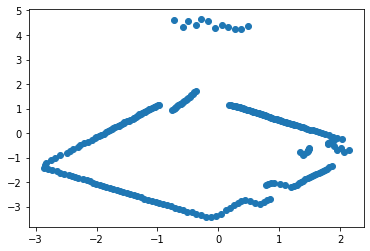

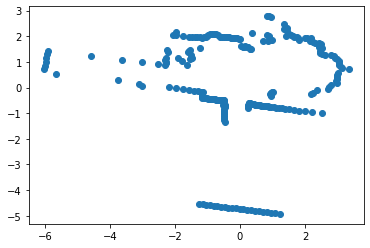

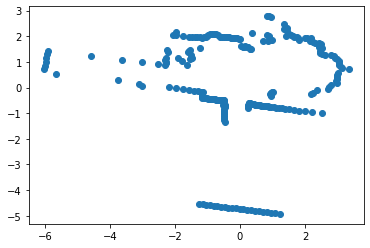

In [4]:
import matplotlib.pyplot as plt

start_time=time.time()
mprime=mymap.predict_scan_from_angles(last_pose.vals,m.angles)
#chisq,grad_sum=mymap.predict_scan_from_angles(last_pose.vals,m.angles).get_fit_gradient(m.to_exact())
dt=time.time()-start_time
print("time took {}".format(dt))
plt.figure()
xy=m.to_exact().to_xypoints(last_pose.vals)
plt.scatter(xy[:,0],xy[:,1])
plt.show()
plt.figure()
#xy=mprime.to_exact().to_xypoints(last_pose.vals)
xy=m_test.to_xypoints(last_pose.vals)
plt.scatter(xy[:,0],xy[:,1])
plt.show()
plt.figure()
#xy=mprime.to_exact().to_xypoints(last_pose.vals)
xy=m_test_shifted.to_xypoints(last_pose.vals)
plt.scatter(xy[:,0],xy[:,1])
plt.show()

#chisq,grad_sum=mymap.predict_scan_from_angles(last_pose.vals,m.angles).get_fit_gradient(m_test)
#print("chisq {}".format(chisq))
#print("grad sum {}".format(grad_sum))

map spread 52
49:153,67:171
time took 0.04391002655029297
pose is [0.12965695 1.9760191  0.24205888]
ys [-5.1        -4.99902913 -4.89805825 -4.79708738 -4.6961165  -4.59514563
 -4.49417476 -4.39320388 -4.29223301 -4.19126214 -4.09029126 -3.98932039
 -3.88834951 -3.78737864 -3.68640777 -3.58543689 -3.48446602 -3.38349515
 -3.28252427 -3.1815534  -3.08058252 -2.97961165 -2.87864078 -2.7776699
 -2.67669903 -2.57572816 -2.47475728 -2.37378641 -2.27281553 -2.17184466
 -2.07087379 -1.96990291 -1.86893204 -1.76796117 -1.66699029 -1.56601942
 -1.46504854 -1.36407767 -1.2631068  -1.16213592 -1.06116505 -0.96019417
 -0.8592233  -0.75825243 -0.65728155 -0.55631068 -0.45533981 -0.35436893
 -0.25339806 -0.15242718 -0.05145631  0.04951456  0.15048544  0.25145631
  0.35242718  0.45339806  0.55436893  0.65533981  0.75631068  0.85728155
  0.95825243  1.0592233   1.16019417  1.26116505  1.36213592  1.4631068
  1.56407767  1.66504854  1.76601942  1.86699029  1.96796117  2.06893204
  2.16990291  2.270873

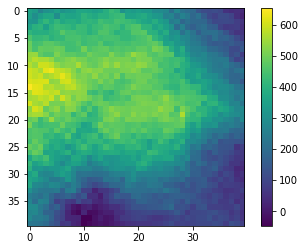

Theta -0.03719380185375834, max 879.9999999999998


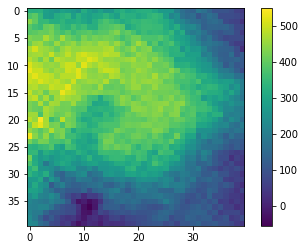

Theta 0.032619368226014855, max 791.9999999999999


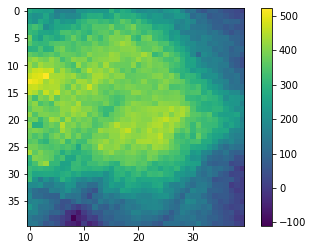

Theta 0.10243253830578805, max 879.9999999999998


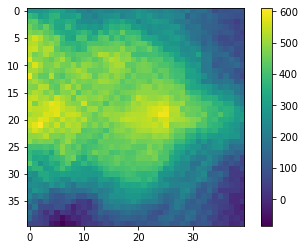

Theta 0.17224570838556125, max 781.9999999999998


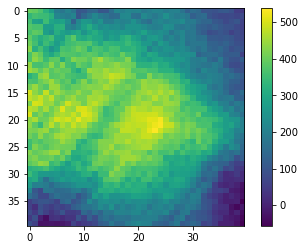

Theta 0.24205887846533441, max 831.9999999999995


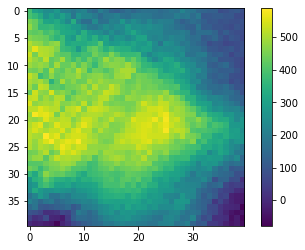

Theta 0.31187204854510764, max 843.9999999999998


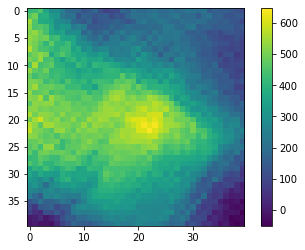

Theta 0.38168521862488086, max 781.9999999999998


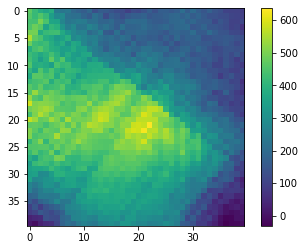

Theta 0.45149838870465403, max 805.9999999999998


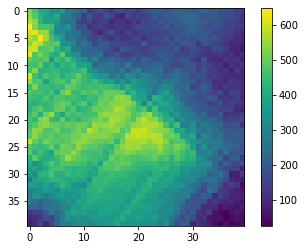

Theta 0.5213115587844273, max 755.9999999999998


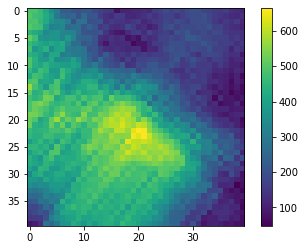

Theta 0.5911247288642003, max 769.9999999999997


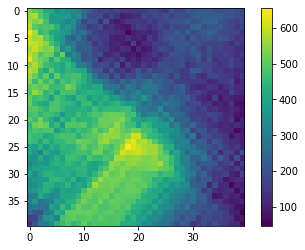

faster time took 0.0009984970092773438
new pose  -0.0+/-0.7 1.3+/-0.9 0.36+/-0.24


In [9]:
last_pose.vals=np.array([0.1296569535680223, 1.9760191036911963, 0.24205887846533436])
#last_pose.vals=np.array([2.0, 0, 0.24205887846533436])
#, "covariance": [[0.002787708221191524, 4.357605543113693e-06, 1.5901913562700983e-06], [4.3576055431136954e-06, 0.002797999515667826, -2.7587965959820832e-06], [1.5901913562700977e-06, -2.7587965959820845e-06, 0.004049503416187571]]}
start_time=time.time()
#posemap,xs,ys,ts,counts=mymap.get_lidar_pose_map3_withtheta(last_pose.vals,m_test_shifted,theta_points=5,theta_res=np.radians(2))
#posemap,xs,ys,ts,cvabs=mymap.get_lidar_pose_map5_withtheta(last_pose.vals,m_test_shifted,theta_points=5,theta_res=np.radians(2.5))
#posemap,xs,ys,ts,cvabs=mymap.get_lidar_pose_map5_withtheta(last_pose.vals,m_test_shifted,theta_points=5,theta_res=np.radians(2.5),local_lidar_map_size=64,global_map_halfsize=64)
#close
theta_points=4
spread_size=10
theta_res=np.radians(2)
#wide
theta_points=5
spread_size=20
theta_res=np.radians(4)
#ultrawide
#theta_points=15
#spread_size=20
#theta_res=np.radians(6)
#full
#theta_points=36
#spread_size=40
#theta_res=np.radians(5)
mdown=m_test_shifted.downsample(2)
local_lidar_map_size=64
global_map_halfsize=int(local_lidar_map_size/2+spread_size)
posemap,xs,ys,ts,cvabs=mymap.get_lidar_pose_map5_withtheta(last_pose.vals,mdown,theta_points=theta_points,theta_res=theta_res,local_lidar_map_size=local_lidar_map_size,global_map_halfsize=global_map_halfsize)
dt=time.time()-start_time
print("time took {}".format(dt))
print("pose is {}".format(last_pose.vals))
print("ys {}".format(xs))
test_size=100*100
logodds_clip=8
#print(counts)
#biggest_number=np.max(counts)
#print(biggest_number)
#start_bin=25
myl=posemap.shape[1]
start_bin=int(myl/2-spread_size)
#stop_bin=75
stop_bin=int(myl/2+spread_size)

if True:    
    #sigma=np.sqrt(np.max(counts))*np.sqrt(logodds_clip)
    clipval=8
    themax=np.max(posemap)
    submap=posemap[:,start_bin:stop_bin,start_bin:stop_bin]
    numrightmap=(submap+themax)/clipval
    numwrongmap=np.max(numrightmap)-numrightmap

    p=0.6
    logprobmap=numrightmap*np.log(p)+numwrongmap*np.log(1-p)
    logprobmap-=np.max(logprobmap)
    probmap=np.exp(logprobmap)

    for i in range(posemap.shape[0]):
        #sigma=np.sqrt(counts[i])*np.sqrt(logodds_clip)
        #sigma=np.sqrt(np.max(posemap[i,:,:]))*np.sqrt(logodds_clip)
        #sigma=np.sqrt(np.max(posemap[i,:,:]))
        
        
        
        

        

        #toshow=(posemap[i,:,:]-np.max(posemap[i,:,:]))/sigma
        print("Theta {}, max {}".format(ts[i],np.max(posemap[i,:,:])))
        #maxval=np.max(posemap[i,start_bin:stop_bin,start_bin:stop_bin])
        #sigmamap=(posemap[i,125:175,125:175]-maxval)/np.sqrt(cvabs[i,start_bin:175,125:175])
        #probmap=np.exp(sigmamap)
        if True:
            plt.figure()
   
            plt.imshow(submap[i])
            #plt.imshow(logprobmap[i])
            #plt.imshow(probmap[i])
            
            plt.colorbar()
            plt.show()
    
best_point = np.unravel_index(np.argmax(posemap, axis=None), posemap.shape)
#rint("best value {}".format(posemap[best_point[0],best_point[1],best_point[2]]))
#print("side best value {}".format(posemap[best_point[0],best_point[1]+1,best_point[2]]))

start_time=time.time()
newpose,chisq=mymap.pose_map_to_pose_prediction4_with_theta_faster(posemap,xs,ys,ts,cvabs,spread_size_x=spread_size,spread_size_y=spread_size,supress_errors=True)
dt=time.time()-start_time
print("faster time took {}".format(dt))
print("new pose {}".format(newpose.pretty_str()))
#start_time=time.time()
#newpose=mymap.pose_map_to_pose_prediction2_with_theta(posemap,xs,ys,ts,counts,spread_size_x=30,spread_size_y=30)
#dt=time.time()-start_time
#print("slower time took {}".format(dt))


#print("new pose {}".format(newpose.pretty_str()))


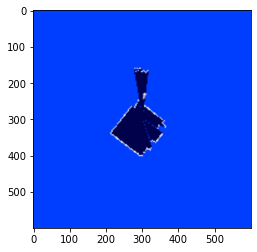

In [6]:
plt.figure()
plt.imshow(mymap.occupancy_to_image(last_pose))
#plt.imshow(mymap.gridmap_logodds)
plt.show()

time took 0.9434814453125


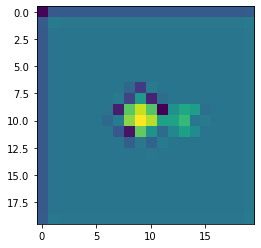

In [7]:
pixel_spacing=10
start_time=time.time()
n=int(mymap.npoints_x/pixel_spacing)
entmap=np.zeros( [n,n] )
for i in range(n):
    icell=i*pixel_spacing
    for j in range(n):
        jcell=j*pixel_spacing
        scan=mymap.predict_scan(mymap.cell_to_coord( (icell,jcell) ) , 12,max_dist=2.0) 
        #print(scan.dists)
        entmap[i,j]=scan.get_entropy()
dt=time.time()-start_time
print("time took {}".format(dt))
plt.figure()
plt.imshow(entmap)
plt.show()


    
    


time took 0.0009965896606445312


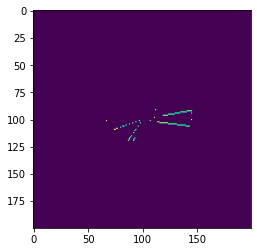

In [8]:
start_time=time.time()
front=mymap.get_frontiers()
dt=time.time()-start_time
print("time took {}".format(dt))
plt.figure()
plt.imshow(front)
plt.show()